In [32]:
from app_store_scraper import AppStore
from pprint import pprint

import matplotlib as plt
import pandas as pd
import os

In [2]:
"""Create a list of common words to remove"""
stop_words=["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", 
            "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", 
            "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", 
            "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", 
            "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", 
            "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", 
            "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", 
            "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", 
            "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than",
            "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

In [14]:
# grab 1,000 us reviews for petfinder
petfinder = AppStore(country="us", app_name="petfinder")
petfinder.review(how_many=10000)

2021-04-24 16:43:28,496 [INFO] Base - Searching for app id
2021-04-24 16:43:29,362 [INFO] Base - Initialised: AppStore('us', 'petfinder', 557228073)
2021-04-24 16:43:29,362 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/petfinder/id557228073
2021-04-24 16:43:34,489 [INFO] Base - [id:557228073] Fetched 1000 reviews (1000 fetched in total)
2021-04-24 16:43:37,197 [INFO] Base - [id:557228073] Fetched 1481 reviews (1481 fetched in total)


In [15]:
# convert the json object response to a dataframe for analysis
reviews_df = pd.DataFrame.from_dict(petfinder.reviews)

In [28]:
reviews_df.drop(columns=['userName', 'date'])

,review,developerResponse,isEdited,rating,title
0,I had given up on this app —- but then the mos...,"{'id': 19758479, 'body': 'We are so happy to h...",False,5,amazing updates
1,We are searching for a puppy and I have used t...,"{'id': 17105050, 'body': 'Thank you so much fo...",False,3,Needs an option to refine search by location
2,App keeps crashing! Every time I find a Kitten...,"{'id': 17959065, 'body': 'Thank you so much fo...",False,3,Keeps Crashing
3,PetFinder has been my preferred website/app to...,"{'id': 16629283, 'body': 'Thank you for your f...",False,1,"Well, it was kind of helpful..."
4,This had been a very robust app until recently...,"{'id': 20272638, 'body': 'Thank you for this d...",False,2,Imbedded ads cause crashing
...,...,...,...,...,...
1476,"This app is great, but it does need a couple o...",NaN,False,2,"Great App, But..."
1477,"Petfinder is a great site, but it's really har...",NaN,False,3,"Better than mobile website, but desperately ne..."
1478,The new version of the app is utterly useless....,NaN,False,1,Search option failure
1479,This app used to be great. Now I can't even ge...,NaN,False,1,Crashes


<AxesSubplot:ylabel='Frequency'>

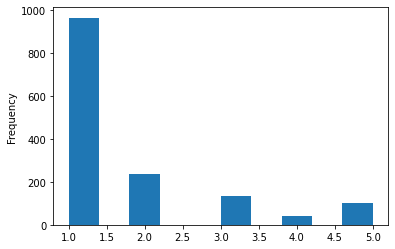

In [44]:
reviews_df['rating'].plot.hist()

In [62]:
corpus = []

for index, row in reviews_df[:5].iterrows():
#     print(col, data)
    for word in row['review'].split(' '):
        corpus.append(word)
#     corpus.append(row['review'].split(' '))

In [64]:
corpus[:5]

['I', 'had', 'given', 'up', 'on']

In [70]:
import spacy
from collections import Counter
nlp = spacy.load('en_core_web_sm')
doc = nlp(" ".join(corpus))
# all tokens that arent stop words or punctuations
words = [token.text
         for token in doc
         if not token.is_stop and not token.is_punct]

# noun tokens that arent stop words or punctuations
nouns = [token.text
         for token in doc
         if (not token.is_stop and
             not token.is_punct and
             token.pos_ == "NOUN")]

# five most common tokens
word_freq = Counter(words)
common_words = word_freq.most_common(50)

# five most common noun tokens
noun_freq = Counter(nouns)
common_nouns = noun_freq.most_common(5)

In [72]:
list(doc.noun_chunks)

[I,
 this app,
 - but then the most recent updates,
 The new map feature,
 user navigability,
 /UX,
 cats,
 FANTASTIC,
 it,
 our new addition,
 helpful update,
 an option,
 a dog,
 you,
 it,
 your search results,
 at least two weeks,
 a month,
 shelters,
 those analytics,
 terms,
 what pets,
 whose profiles,
 more info,
 Thanks,
 the amazing and helpful updates,
 the user-friendliness,
 the app,
 We,
 a puppy,
 I,
 the website,
 lots,
 information,
 animals,
 breeds,
 I,
 the site,
 shelters,
 I,
 the same search,
 I,
 an app,
 our search,
 the app,
 all the same information,
 the website,
 I,
 my favorites,
 the website,
 my favorites,
 the app,
 the same log,
 information,
 I,
 the pup,
 name,
 them,
 it,
 I,
 my search,
 location,
 the website,
 the app,
 distance,
 The farthest search,
 you,
 100 miles,
 the next option,
 We,
 up to 300 miles,
 the country,
 you,
 you,
 each profile,
 the animal,
 so many dogs,
 it,
 one,
 us,
 I,
 the website,
 my favorites,
 the app,
 I,
 the app

In [73]:
common_nouns

[('app', 24), ('search', 10), ('website', 7), ('time', 6), ('pets', 5)]

In [74]:
common_words

[('app', 24),
 ('search', 14),
 ('website', 7),
 ('time', 6),
 ('find', 6),
 ('new', 5),
 ('pets', 5),
 ('helpful', 4),
 ('\n\n', 4),
 ('breeds', 4),
 ('favorites', 4),
 ('able', 4),
 ('profile', 4),
 ('like', 4),
 ('different', 4),
 ('3', 4),
 ('use', 4),
 ('\n', 4),
 ('cats', 3),
 ('update', 3),
 ('option', 3),
 ('need', 3),
 ('information', 3),
 ('log', 3),
 (' ', 3),
 ('scroll', 3),
 ('order', 3),
 ('pet', 3),
 ('application', 3),
 ('freezes', 3),
 ('ad', 3),
 ('recent', 2),
 ('updates', 2),
 ('user', 2),
 ('easier', 2),
 ('dog', 2),
 ('interested', 2),
 ('filtered', 2),
 ('results', 2),
 ('weeks', 2),
 ('shelters', 2),
 ('profiles', 2),
 ('searching', 2),
 ('animals', 2),
 ('times', 2),
 ('add', 2),
 ('consuming', 2),
 ('miles', 2),
 ('dogs', 2),
 ('face', 2)]